## Step 1: Importing libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline


# Load the dataset
data = pd.read_table("sportsdata.txt", delimiter=",",header=0)
print(data.head())  # Show the first few rows of the dataset


  Activity  T-x_acc (1)  T-y_acc (1)  T-z_acc (1)  T-x_gryo (1)  T-y_gryo (1)  \
0       A1       8.1305       1.0349       5.4217     -0.009461      0.001915   
1       A1       7.9665       1.1684       5.6755     -0.005730      0.026995   
2       A1       7.8917       1.1390       5.6980      0.014180      0.028722   
3       A1       7.9366       1.1536       5.6318      0.003242      0.029965   
4       A1       7.8913       1.1972       5.9082     -0.044333     -0.067467   

   T-z_gryo (1)  T-x_mag (1)  T-y_mag (1)  T-z_mag (1)  ...  RL-z_mag (125)  \
0     -0.003424     -0.78712    -0.069654      0.15730  ...       -0.036874   
1     -0.009029     -0.79062    -0.071635      0.13429  ...       -0.038551   
2     -0.009079     -0.79531    -0.069460      0.12447  ...       -0.040145   
3      0.009111     -0.79292    -0.070358      0.13194  ...       -0.041109   
4     -0.004235     -0.79592    -0.073174      0.12086  ...       -0.039495   

   LL-x_acc (125)  LL-y_acc (125)  LL-

## Step 2: Separating Features and Labels

Here, we're organizing our data. We decide what we want to predict (Activity) and what information (features) we use to make that prediction.

In [2]:
# Separate the features and the class labels
CLASS = data['Activity']  # This is what we want to predict
x = data.drop('Activity', axis=1)  # These are the features


## Step 3: Standardizing the Features

Before we analyze the data, we make sure all the numbers are on a similar scale, like converting all currencies to dollars before doing calculations.

In [3]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
x_scaled = scaler.fit_transform(x)


## Step 4: Applying PCA

PCA is like summarizing a long book into a few key sentences. It helps us reduce the amount of data while keeping the important parts.

In [4]:
# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA on the scaled features
pca.fit(x_scaled)

# Transform the scaled features
x_pca = pca.transform(x_scaled)


## Step 5: Visualizing Explained Variance

### Plot 1 & 2: Explained Variance by Each Component

This step involves making graphs to show how much of the original data's information is captured by each component of our PCA summary.

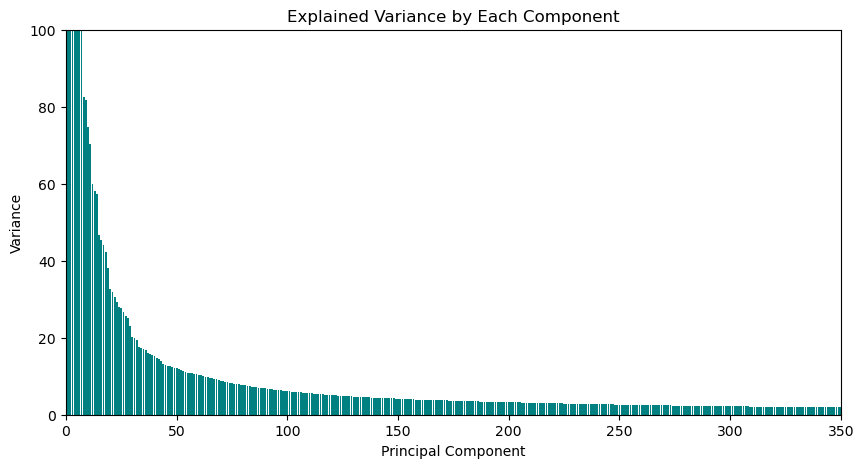

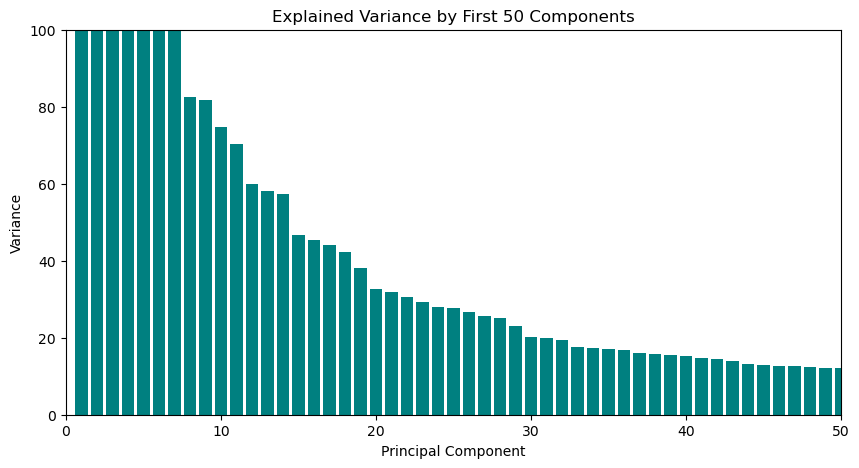

In [5]:
# Plot 1: Explained Variance for all components
plt.figure(figsize=(10, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_, color='teal')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.xlim([0, 350])
plt.ylim([0, 100])
plt.title('Explained Variance by Each Component')
plt.show()

# Plot 2: Focusing on the first 50 components
plt.figure(figsize=(10, 5))
plt.bar(range(1, 51), pca.explained_variance_[:50],color='teal')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.xlim([0, 50])
plt.ylim([0, 100])
plt.title('Explained Variance by First 50 Components')
plt.show()

### Plot 3 & 4: Cumulative Explained Variance

This shows how much information is captured as you add more PCA components together.

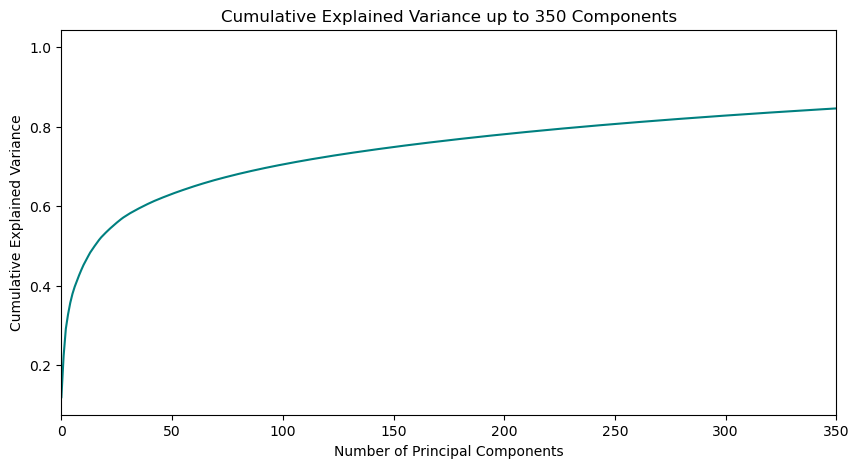

Cumulative variance explained by 350 components: 0.8457


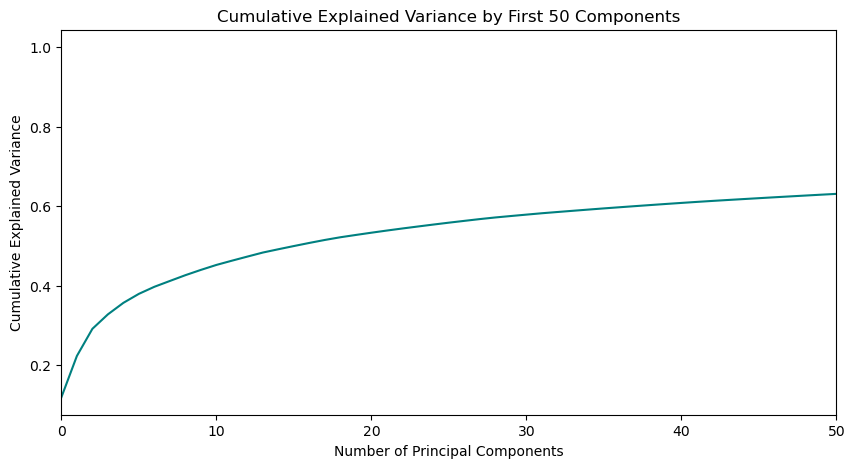

Cumulative variance explained by 50 components: 0.6289


In [6]:
# Plot 3: Cumulative Explained Variance up to 350 components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='teal')
plt.xlim(0, 350)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance up to 350 Components')
plt.show()

# Checking the cumulative variance explained by 350 components
print(f"Cumulative variance explained by 350 components: {np.cumsum(pca.explained_variance_ratio_)[349]:.4f}")

# Plot 4: Cumulative Explained Variance for the first 50 components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='teal')
plt.xlim(0, 50)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by First 50 Components')
plt.show()

# Checking the cumulative variance explained by 50 components
print(f"Cumulative variance explained by 50 components: {np.cumsum(pca.explained_variance_ratio_)[49]:.4f}")


## Step 6: Preprocess and Apply PCA 

FC stands for the number of features (or Principal Components) you decide to keep after PCA. Here, FC = 50 means you're choosing to summarize your original dataset into 50 components. This is like summarizing a detailed map into a simpler, more manageable guide that still helps you navigate well enough.

In [7]:
# Number of components you want to keep
FC = 50

# Create a pipeline with scaling and PCA
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=FC))
])

# Fit and transform the data
transformed = pipeline.fit_transform(x)

# Convert the numpy array to a list of lists
tran = transformed.tolist()



## Step 7: Convert Numerical Values to Strings

Finally, this nested loop goes through each item in our transformed data (tran) and converts the numerical values into strings (text). This might be necessary for output formatting or because the next step in the process requires text inputs. Each value representing a principal component score is turned from a number (like 2.345) into a string of characters ("2.345"), making it easier to save to a text file or display in a user-friendly manner.

In [8]:
for i in range(len(tran)):
    for j in range(FC):
        tran[i][j] = str(tran[i][j])


## Step 8: Prepare the Header and Save the Data

After PCA, we may want to save our transformed data. This involves writing the PCA-transformed data back into a file format that can be easily used later.

In [9]:
# Create a list for the header
list0 = ["Attribute " + str(i) for i in range(1, FC+1)]

# Join the list into a single string separated by commas
header = ",".join(list0)

# Open a file to write the transformed data
with open('sportsdataPCA2.txt', 'w') as file:
    # Write the header
    file.write(header + "\n")
    
    # Write each item of transformed data
    for item in tran:
        row = ",".join(item)
        file.write(row + "\n")


This process transforms the complex, high-dimensional data into a more manageable, summarized form that still captures the essence of the original dataset. We can then use this transformed data for further analysis, modeling, or visualization.